# Instruções Gerais

*   A atividade é **individual**. Cópias e plágios não serão tolerados
*   Data de entrega: **23/07/2021, até as 23:59h**

  * Apenas pelo **Classroom**
  * Façam uma cópia do notebook, e trabalhem nela para a entrega até o prazo definido
  * **Atentem para todos os pontos de `# TODO:`**, pois estes são os pontos de implemenntação
* Sobre política de atrasos: 
  * cada aluno terá a **tolerância de 2 dias de atraso, considerado todos os exercícios** propostos. 
  * A partir do terceiro dia, 60% da nota obtida será computada. 
  * Do quarto dia em diante, não será atribuída nota alguma.



# Imports iniciais

In [162]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

# Definição de um model simples para testes usando sklearn

In [163]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)

# Carregando e Divisão de Dados

In [164]:
from sklearn.datasets import load_iris
iris = load_iris()
x = iris.data
y = iris.target

## Validação cruzada

### Holdout

In [165]:
# defina a separação dos dados (X, y) utilizando 70% para treino e 30% para teste
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(x, y,test_size = 0.3,random_state=1) # passando test_size como 0.3 é possível utilizar 30% do conjunto para testes e 70% para treinamento


# TODO: treine e avalie o modelo com os dados separados
model.fit(X_train,y_train)

results_training = model.predict(X_train)
results_prediction = model.predict(X_test)

print("Knn ACC TRAINING:", accuracy_score(y_train, results_training))
print("Knn ACC TEST:",accuracy_score(y_test, results_prediction))

Knn ACC TRAINING: 0.9523809523809523
Knn ACC TEST: 0.9777777777777777


### K-Folds

É possível usar o módulo [`cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) do sklearn

In [166]:
from sklearn.model_selection import cross_val_score
folds = 3
# TODO: defina aqui a chamada
print("cv_score:")
print(cross_val_score(model, x, y, cv=folds))

cv_score:
[0.98 0.96 0.98]


Ou até expandir para executar o K vezes, seguindo um processo manual

In [167]:
from sklearn.model_selection import KFold
x_times = 3
k_folds = 3
accs = []

for k in range(x_times):
    splits = KFold(n_splits=k_folds, shuffle=True)
    # a chamada .split() retorna os índices que devem ser usados em cada rodada
    for train, test in splits.split(x):
      X_train, X_test = x[train],x[test]
      y_train, y_test = y[train],y[test]
      # TODO: Treino e avaliação

      model.fit(X_train,y_train)
      results = model.predict(X_test)
      accs.append(accuracy_score(y_test, results))
      print("Knn ACC TEST:",accuracy_score(y_test, results))

average = sum(accs)/len(accs)
print("Acurácia média: %.2f"  % (average))

Knn ACC TEST: 0.96
Knn ACC TEST: 0.96
Knn ACC TEST: 0.98
Knn ACC TEST: 0.96
Knn ACC TEST: 0.96
Knn ACC TEST: 0.92
Knn ACC TEST: 0.96
Knn ACC TEST: 0.94
Knn ACC TEST: 0.96
Acurácia média: 0.96


# Regressão Linear

Geração aleatória de um conjunto de dados simples

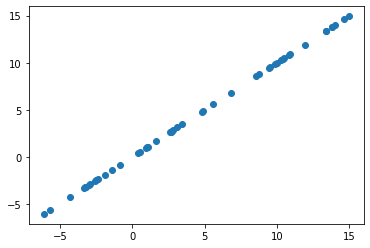

In [168]:
rng = np.random.RandomState(1)
x_regression = 10 * rng.rand(50)
y_regression = 2 * x_regression - 5 + rng.randn(50)
plt.scatter(y_regression, y_regression);

Importação e utilização do módulo [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)  para fazer um ajuste linear as dados gerados

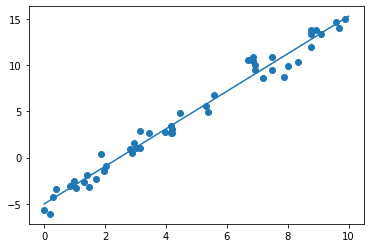

In [169]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(x_regression[:, np.newaxis], y_regression)

x_fit = np.linspace(0, 10, 1000)
y_fit = model.predict(x_fit[:, np.newaxis])

plt.scatter(x_regression, y_regression)
plt.plot(x_fit, y_fit);

Agora, considere a implementação da Regressão Linear do zero, sem o uso do `sklearn` ou outra biblioteca de Machine Learninng.

In [170]:
# TODO:

mean_x = np.mean(x_regression)
mean_y = np.mean(y_regression)

m = len(x_regression)

# calculo de m & c
# m = numerador / denominador, onde 
# numerador = Somatorio de todas as amostras x - a media das amostras x multiplicado pela subtração de cada amostra y pela sua média
# denominador = somatorio de todas as x - a sua media, valor esse elevado ao quadrado
# c = media(y) - m*(media(x))
numer = 0
denom = 0
for i in range(m):
  numer += (x_regression[i] - mean_x) * (y_regression[i] - mean_y)
  denom += (x_regression[i] - mean_x) ** 2
m = numer / denom
c = mean_y - (m * mean_x)

print (f'm = {m} \nc = {c}')

m = 2.0272088103606953 
c = -4.998577085553204


In [171]:
# Cálculo R-quadraditico para avaliação do modelo 

ss_t = 0
ss_r = 0 

# laço para ajuste da linha
for i in range(len(x_regression)): 
  y_pred = c + m * x_regression[i]
  ss_t += (y_regression[i] - mean_y) ** 2
  ss_r += (y_regression[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)

print(r2)

0.9790800609430612


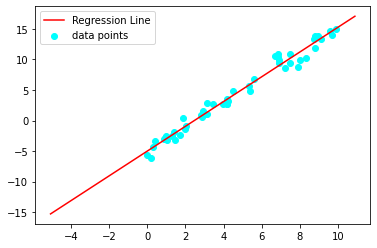

In [172]:
# plotting values and regression line
max_x = np.max(x_regression) + 1
min_x = np.min(y_regression) + 1

# calculating line values x and y
x = np.linspace (min_x, max_x,2)
y = c + m * x

plt.plot(x, y, color='red', label='Regression Line')
plt.scatter(x_regression, y_regression, c='cyan', label='data points')

plt.legend()
plt.show()

# Máquinas de Vetores de Suporte

Geração de dados iniciais

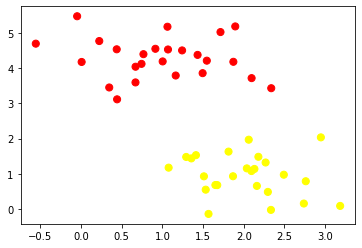

In [173]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

Para definir o modelo, podemos usar módule [`SVC (Support Vector Classifier)`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) do [`sklearn.svm`](https://scikit-learn.org/stable/modules/svm.html#:~:text=Support%20vector%20machines%20(SVMs)%20are,than%20the%20number%20of%20samples.)

In [174]:
from sklearn.svm import SVC

Com teste inicial, podemos treinar e avaliar um modelo com um kernel linear

In [175]:
# TODO: separação dos dados X, y
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)

model = SVC(kernel='linear')
model.fit(X_train, y_train)

results_training = model.predict(X_train)
results_test = model.predict(X_test)

print("SVC ACC TRAINING:",accuracy_score(y_train, results_training))
print("SVC ACC TEST:",accuracy_score(y_test, results_test))

SVC ACC TRAINING: 1.0
SVC ACC TEST: 1.0


E para problemas não lineares?

Geração de dados

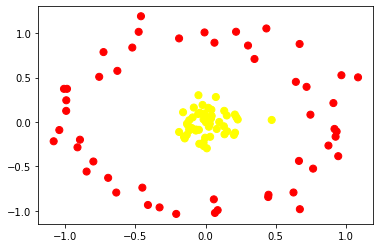

In [176]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

A partir da visualização anterior dos dados, encontre a melhor configuração para um modelo `SVM` (lembrem-se do `truque do kernel` -- variem este parâmetro [`rbf`, `poly`, `sigmoid`, etc]). Para isso, façam testes paramétricos e avaliem o resultado obtido.

Dica: é possível plotar os vetores de suporte para entender o comportamento após treinamento. Vejam o `model.support_vectors`

[ 0  6  9 51 52 58 21 26 47 49 61]
[6 5]


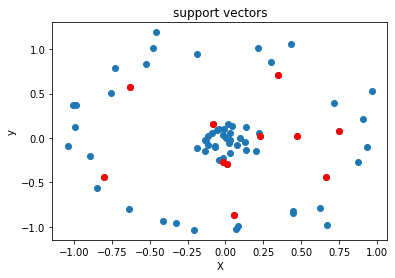

SVC rbf ACC TRAINING : 1.0
SVC rbf ACC TEST: 1.0


In [177]:
# TODO: 
from sklearn import svm
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3,random_state=1)

model = SVC(kernel='rbf')
model.fit(X_train, y_train)

results_training = model.predict(X_train)
results_test = model.predict(X_test)

support_vector_indices = model.support_
print(support_vector_indices)

support_vectors_per_class = model.n_support_
print(support_vectors_per_class)

# Get support vectors themselves
support_vectors = model.support_vectors_

# Visualize support vectors
plt.scatter(X_train[:,0], X_train[:,1])
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
plt.title('support vectors')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

print("SVC rbf ACC TRAINING :",accuracy_score(y_train, results_training))
print("SVC rbf ACC TEST:",accuracy_score(y_test, results_test))



[ 0  1  3  6  7  9 11 13 14 15 17 18 22 23 24 25 29 31 35 36 38 40 43 45
 48 51 52 56 57 58 60 62 65 67  2  4  5  8 10 12 16 20 21 26 27 28 30 32
 33 34 37 41 42 44 46 49 50 53 54 55 59 61 63 64 66 68 69]
[34 33]


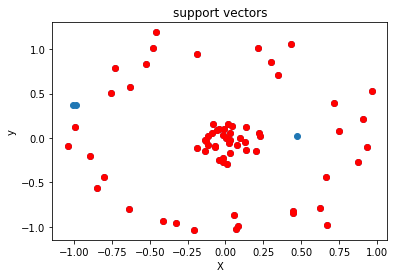

SVC poly ACC TRAINING: 0.7
SVC poly ACC TEST: 0.7


In [178]:
model = SVC(kernel='poly')
model.fit(X_train, y_train)

results_training = model.predict(X_train)
results_test = model.predict(X_test)

support_vector_indices = model.support_
print(support_vector_indices)

support_vectors_per_class = model.n_support_
print(support_vectors_per_class)

# Get support vectors themselves
support_vectors = model.support_vectors_

# Visualize support vectors
plt.scatter(X_train[:,0], X_train[:,1])
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
plt.title('support vectors')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

print("SVC poly ACC TRAINING:",accuracy_score(y_train, results_training))
print("SVC poly ACC TEST:",accuracy_score(y_test, results_test))

[ 0  1  3  6  7  9 11 13 14 15 17 18 19 22 23 24 25 29 31 35 36 39 43 45
 48 51 52 56 57 58 60 62 65 67  2  4  5  8 10 12 16 20 21 26 27 28 30 32
 33 34 37 41 42 44 46 47 49 50 53 54 55 59 61 63 64 66 68 69]
[34 34]


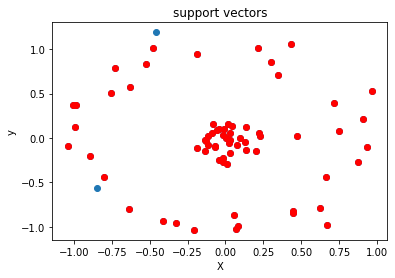

SVC sigmoid ACC TRAINING: 0.6285714285714286
SVC sigmoid ACC TEST: 0.6666666666666666


In [179]:
model = SVC(kernel='sigmoid')
model.fit(X_train, y_train)

support_vector_indices = model.support_
print(support_vector_indices)

support_vectors_per_class = model.n_support_
print(support_vectors_per_class)

# Get support vectors themselves
support_vectors = model.support_vectors_

# Visualize support vectors
plt.scatter(X_train[:,0], X_train[:,1])
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
plt.title('support vectors')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

results_training = model.predict(X_train)
results_test = model.predict(X_test)

print("SVC sigmoid ACC TRAINING:",accuracy_score(y_train, results_training))
print("SVC sigmoid ACC TEST:",accuracy_score(y_test, results_test))

# Árvores de decisão: classificação de dígitos

Carregamento dos dados

In [180]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target

In [181]:
# TODO: façam a separação dos dados utilizando um coonjunto holdout 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3,random_state=1)



# TODO: treinem o modelo
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train,y_train)

# TODO: avaliem o resultado
dtc.predict(X_test)

results_training = dtc.predict(X_train)
results_test = dtc.predict(X_test)

print("DTC ACC TRAINING:",accuracy_score(y_train, results_training))
print("DTC ACC TEST:",accuracy_score(y_test, results_test))

DTC ACC TRAINING: 1.0
DTC ACC TEST: 0.8592592592592593


# Ensemble

Escolha pelo menos 2 modelos discutidos para fazer um ensemble utilizando o mesmo conjunto de dados do exemplo anterior

In [182]:
# TODO: